# Signal Detection: CNN and GLRT Prediction

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from preprocessing import load_and_preprocess_data
from cnn import CNN
from glrt import find_glrt_threshold, evaluate_glrt

## Load and Preprocess Data

In [2]:
X_train, X_test, y_train, y_test, signal2_start_times = load_and_preprocess_data(
    filepath='../data/original/processed_signals.mat'
)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (24000, 8, 500, 2)
Testing data shape: (6000, 8, 500, 2)


In [3]:
print(f"Label data shape: {y_train.shape}, {y_test.shape}")

Label data shape: (24000, 2), (6000, 2)


## CNN Model Training and Evaluation

In [4]:
# Train CNN model
model, history = CNN(X_train, y_train, model_name='cnn', save_dir='../models/noattack')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8761 - loss: 0.2691 - val_accuracy: 0.9581 - val_loss: 0.1085
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9523 - loss: 0.1342 - val_accuracy: 0.9685 - val_loss: 0.0895
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9600 - loss: 0.1110 - val_accuracy: 0.9598 - val_loss: 0.1037
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9653 - loss: 0.0973 - val_accuracy: 0.9640 - val_loss: 0.0982
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9704 - loss: 0.0914 - val_accuracy: 0.9721 - val_loss: 0.0795
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9705 - loss: 0.0828 - val_accuracy: 0.9723 - val_loss: 0.0747
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9741 - loss: 0.0788 - val_accuracy: 0.9760 - val_loss: 0.0655
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9776 - loss: 0.0687 - val_acc

In [5]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9812 - loss: 0.0591
CNN Test accuracy: 0.9785


## GLRT Analysis

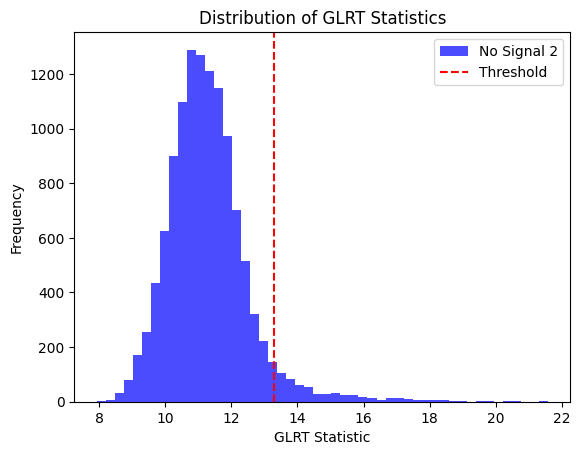

GLRT threshold: 13.2939


In [8]:
# Find GLRT threshold on training set
threshold, glrt_values = find_glrt_threshold(X_train, y_train)
print(f'GLRT threshold: {threshold:.4f}')

In [9]:
glrt_accuracy, glrt_predictions = evaluate_glrt(X_test, y_test, threshold)
print(f'GLRT Test accuracy: {glrt_accuracy:.4f}')

GLRT Test accuracy: 0.9190


In [12]:
accuracy_df = pd.DataFrame([{
    'glrt_threshold': threshold,
    'test_accuracy': glrt_accuracy
}])

accuracy_df.to_csv('../results/noattack/glrt_accuracy.csv')

In [ ]:
glrt_pred_df = pd.DataFrame({
    'y_true': np.argmax(y_test, axis=1),
    'y_pred': glrt_predictions
})

glrt_pred_df.to_csv('../results/noattack/glrt_predictions.csv')

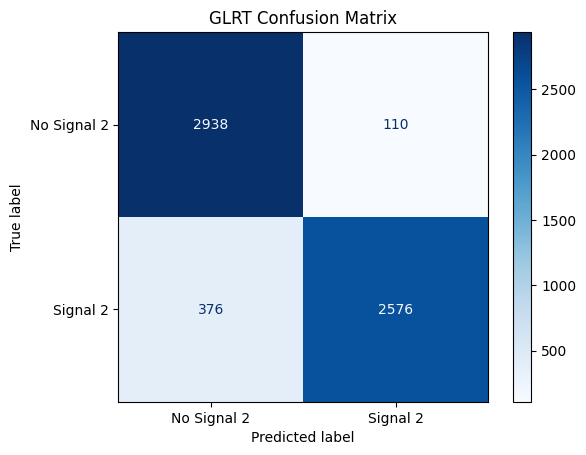

In [17]:
# Confusion matrix
cm = confusion_matrix(glrt_pred_df['y_true'], glrt_pred_df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Signal 2", "Signal 2"])
disp.plot(cmap='Blues')
plt.title('GLRT Confusion Matrix')
plt.savefig('../results/noattack/glrt_confusion_matrix.png')
plt.show()